In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Load dataset
data = pd.read_csv('train.csv')

In [9]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

# Splitting data into training and development sets
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [10]:
X_train.shape

(784, 41000)

In [11]:
Y_train.shape

(41000,)

In [12]:
def init_params(): #Initialize the weights and biases for a 3-layer neural network.
    W1 = np.random.rand(100, 784) - 0.5 # First layer weights
    b1 = np.random.rand(100, 1) - 0.5   # First layer bias
    W2 = np.random.rand(100, 100) - 0.5 # Second layer weights
    b2 = np.random.rand(100, 1) - 0.5   # Second layer bias
    W3 = np.random.rand(10, 100) - 0.5  # Output layer weights
    b3 = np.random.rand(10, 1) - 0.5    # Output layer bias
    return W1, b1, W2, b2, W3, b3

#ReLU activation function.
def ReLU(Z):
    return np.maximum(Z, 0)

#Softmax activation function for multi-class classification.
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

#Performs forward propagation through the neural network.
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2, Z3, A3

#Derivative of ReLU activation function.
def ReLU_deriv(Z):
    return Z > 0

#One-hot encodes the labels for multi-class classification.
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

#Computes gradients using backward propagation.
def backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2, dW3, db3

#Updates the parameters using gradient descent.
def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3 
    return W1, b1, W2, b2, W3, b3

In [13]:
#Returns predicted class labels.
def get_predictions(A3):
    return np.argmax(A3, 0)

#Calculates the accuracy of the model.
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

#Performs gradient descent optimization.
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2, W3, b3 = init_params()
    acc = np.zeros((iterations,2))
    for i in range(iterations):
        Z1, A1, Z2, A2, Z3, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3, A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2, dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            acc[i][1] = get_accuracy(predictions, Y)
            acc[i][0]= i
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2, W3, b3, acc

In [14]:
W1, b1, W2, b2, W3, b3, acc = gradient_descent(X_train, Y_train, 0.10, 1200)

Iteration:  0
[1 2 2 ... 8 2 8] [5 8 2 ... 1 5 3]
[1 2 2 ... 8 2 8] [5 8 2 ... 1 5 3]
0.08039024390243903
Iteration:  10
[1 1 2 ... 5 5 3] [5 8 2 ... 1 5 3]
[1 1 2 ... 5 5 3] [5 8 2 ... 1 5 3]
0.37858536585365854
Iteration:  20
[5 1 2 ... 5 8 3] [5 8 2 ... 1 5 3]
[5 1 2 ... 5 8 3] [5 8 2 ... 1 5 3]
0.5489512195121952
Iteration:  30
[5 8 2 ... 1 8 3] [5 8 2 ... 1 5 3]
[5 8 2 ... 1 8 3] [5 8 2 ... 1 5 3]
0.6436585365853659
Iteration:  40
[5 8 2 ... 1 8 3] [5 8 2 ... 1 5 3]
[5 8 2 ... 1 8 3] [5 8 2 ... 1 5 3]
0.694390243902439
Iteration:  50
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
0.728609756097561
Iteration:  60
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
0.7536585365853659
Iteration:  70
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
0.774609756097561
Iteration:  80
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 3]
0.7897560975609756
Iteration:  90
[5 5 2 ... 1 5 3] [5 8 2 ... 1 5 

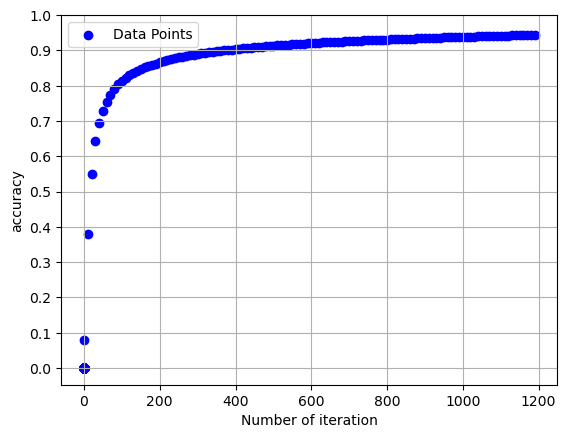

In [15]:
# Plot the model's accuracy over iterations to visualize training progress.

x = acc[:, 0]
y = acc[:, 1]

plt.scatter(x, y, color='b', marker='o', label="Data Points")

# Labels and title
plt.xlabel("Number of iteration")
plt.ylabel("accuracy")
plt.legend()
plt.grid(True)
plt.yticks(np.arange(min(y), max(y) + 0.1, 0.1))

# Show plot
plt.show()

In [16]:
#Making predictions on the test set

def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _,_,_, A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

dev_predictions = make_predictions(X_dev, W1, b1, W2, b2, W3, b3)
get_accuracy(dev_predictions, Y_dev)

[4 1 2 8 3 0 2 1 4 1 5 6 0 2 7 8 3 7 4 6 1 4 0 1 6 1 2 4 1 0 0 6 3 9 9 7 6
 6 5 8 7 4 8 7 2 9 2 8 6 6 1 1 5 5 2 3 0 2 0 3 7 3 3 5 2 2 5 9 9 9 8 9 6 3
 1 0 6 5 7 0 1 8 0 6 5 6 5 5 5 9 7 5 9 4 6 9 6 9 2 2 4 9 6 5 1 8 5 1 4 0 3
 2 0 8 2 8 1 5 7 6 4 0 1 7 1 6 2 3 2 9 5 6 7 6 2 9 2 7 4 3 1 9 2 7 4 0 3 2
 8 6 4 8 1 4 3 9 8 4 7 1 5 4 1 0 9 2 0 3 9 9 8 7 0 9 8 9 2 3 3 4 4 6 7 0 8
 4 6 8 9 8 5 3 1 9 0 6 8 1 3 5 6 8 1 5 7 1 5 2 3 9 1 2 3 4 0 2 6 4 9 2 4 6
 3 2 7 9 4 1 9 4 5 7 5 9 9 5 4 3 6 7 9 7 5 4 7 1 2 8 6 6 4 9 7 2 9 2 2 1 5
 0 9 3 5 3 9 0 3 8 3 0 2 2 3 0 9 8 9 1 1 9 1 9 3 9 9 9 5 7 4 1 1 5 2 5 6 3
 8 3 7 5 2 2 9 2 1 7 9 9 6 0 2 8 4 5 1 7 5 8 2 9 3 9 1 8 4 0 9 9 5 0 1 1 0
 1 5 8 2 5 0 4 0 4 9 3 4 7 2 3 1 6 4 5 8 3 2 6 7 0 6 4 4 9 4 2 3 8 0 2 6 7
 1 3 1 0 1 9 9 2 3 4 0 1 8 6 4 8 7 6 4 7 7 0 2 3 8 9 7 0 5 8 9 1 4 3 2 7 1
 5 0 9 9 8 2 9 1 4 1 6 2 9 9 9 0 7 2 5 2 9 4 1 6 5 1 2 3 3 9 1 3 9 6 0 3 0
 5 8 1 2 2 3 3 4 5 6 7 3 3 5 8 7 7 9 6 2 2 2 1 5 6 6 1 5 5 0 0 1 4 2 9 8 5
 0 6 1 9 0 9 2 4 1 9 3 7 

0.917

Prediction:  [5]
Label:  5


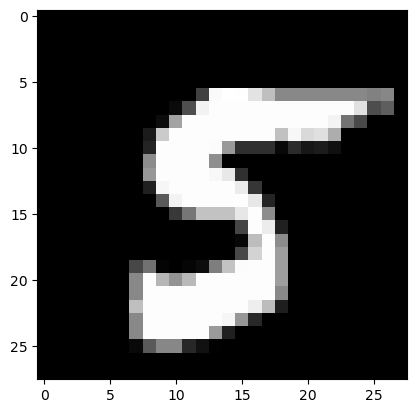

Prediction:  [8]
Label:  8


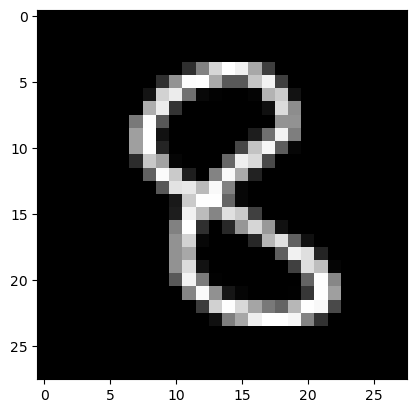

Prediction:  [2]
Label:  2


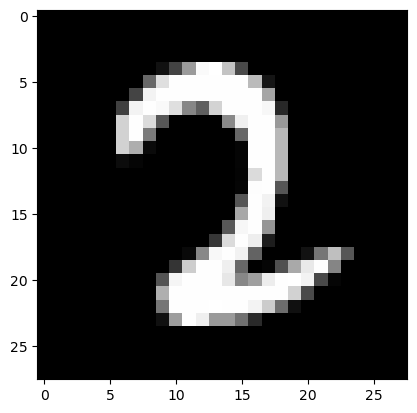

Prediction:  [8]
Label:  8


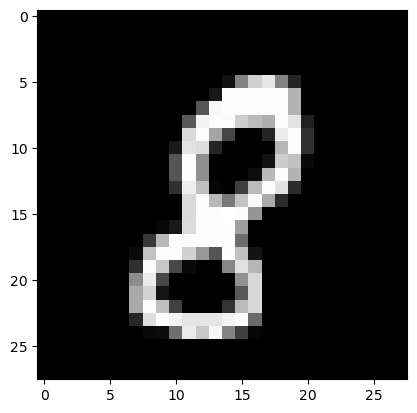

In [17]:
#Examples

test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)